In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [86]:
from settings import BASE_DIR

In [87]:


def load_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file into a pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded data as a DataFrame.
    """
    full_path = f"{BASE_DIR}/{file_path}"
    df = pd.read_csv(full_path)
    return df

In [136]:
# load recorded data
data = load_data("Reports/sim_data_g2a26cb25_fs_FS.csv")
print(data.head(25))

     time        name            x         y         z      speed  \
0   0.081      leader  9500.000000 -4.500000  0.498808   0.132250   
1   0.081  follower_0  9508.000000 -4.500000  0.499327   0.093751   
2   0.160      leader  9499.999023 -4.500527  0.498668   0.395666   
3   0.160  follower_0  9507.944336 -4.500000  0.499188  14.553129   
4   0.220      leader  9499.979492 -4.500527  0.486656   0.632701   
5   0.220  follower_0  9507.944336 -4.500000  0.484991   0.498082   
6   0.301      leader  9499.968750 -4.503913  0.483216   0.513772   
7   0.301  follower_0  9507.592773 -4.500000  0.481542  14.578114   
8   0.381      leader  9499.956055 -4.503913  0.479553   0.558877   
9   0.381  follower_0  9507.592773 -4.500000  0.477880   0.244539   
10  0.440      leader  9499.943359 -4.507452  0.475802   0.586815   
11  0.440  follower_0  9507.222656 -4.500000  0.474119  14.590024   
12  0.500      leader  9499.931641 -4.507452  0.473042   0.571202   
13  0.500  follower_0  9507.222656

In [137]:
# get speed between 50 to 80 seconds and print time and speed columns
speed_50_80 = data[(data['time'] >= 58) & (data['time'] <= 80)][['name','time', 'speed','acc']]
print(speed_50_80.head(50))

            name    time     speed       acc
1634      leader  58.001  0.000823 -0.000000
1635  follower_0  58.001  0.001156 -0.000238
1636      leader  58.041  0.000346 -0.000000
1637  follower_0  58.041  0.000420 -0.000221
1638      leader  58.101  0.001097  0.000000
1639  follower_0  58.101  0.001493 -0.000221
1640      leader  58.181  0.000466  0.000000
1641  follower_0  58.181  0.000678 -0.000222
1642      leader  58.241  0.000458  0.000000
1643  follower_0  58.241  0.000635 -0.000201
1644      leader  58.321  0.000614  0.000000
1645  follower_0  58.321  0.000870 -0.000206
1646      leader  58.401  0.000351 -0.000000
1647  follower_0  58.401  0.000524 -0.000567
1648      leader  58.481  0.000372 -0.000000
1649  follower_0  58.481  0.000550 -0.000578
1650      leader  58.561  0.000434 -0.000000
1651  follower_0  58.561  0.000628 -0.000561
1652      leader  58.641  0.000489 -0.000000
1653  follower_0  58.641  0.000756 -0.000578
1654      leader  58.721  0.000066 -0.000000
1655  foll

In [90]:
# check if any record in gap column is  zero
zero_gap_records = data[data['gap'] == 0]
print(f"Number of records with zero gap: {len(zero_gap_records)}")

Number of records with zero gap: 0


In [91]:
# minimum gap value
min_gap = data['gap'].min()
print(f"Minimum gap value: {min_gap}")

Minimum gap value: 4.739259719848633


In [92]:
# maximum gap value
max_gap = data['gap'].max()
print(f"Maximum gap value: {max_gap}")

Maximum gap value: 5.956171035766602


In [93]:
# check when leader speed is zero, what are the gap values for the next 50 records
leader_zero_gap = data[data['speed'] == 0]['gap']
print(f"Gap values when leader speed is zero: {leader_zero_gap.tolist()}")

Gap values when leader speed is zero: []


In [94]:
# minimum speed value
min_speed = data['speed'].min()
print(f"Minimum speed value: {min_speed}")

Minimum speed value: 0.0467542359703217


In [95]:
# maximum speed value
max_speed = data['speed'].max()
print(f"Maximum speed value: {max_speed}")

Maximum speed value: 14.242097874705284


In [96]:


# get zero acceleration values of follower vehicle
zero_acceleration = data[data['speed'] == 0.0][['name','time', 'speed', 'acc', 'gap']]
print(f"Number of records with zero acceleration: {len(zero_acceleration)}")
print("Records with zero acceleration:")
zero_acceleration.head()

Number of records with zero acceleration: 0
Records with zero acceleration:


,name,time,speed,acc,gap


In [97]:
# minimum gap
min_acc = data['gap'].min()
print(f"Minimum acceleration value: {min_acc}")

Minimum acceleration value: 4.739259719848633


# Plot command velocity vs gap distribution


In [98]:
def plot_command_velocity_and_gap(data: pd.DataFrame,max_points: int = 1000):

    data = data.head(max_points)  # Limit to max_points for clarity
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['gap'], data['speed'], alpha=0.5)
    plt.title('Command Velocity vs Gap')
    plt.xlabel('Gap (m)')
    plt.ylabel('Command Velocity (m/s)')
    plt.grid(True)
    plt.xlim(0, data['gap'].max() + 5)
    plt.ylim(0, data['speed'].max() + 5)
    plt.show()

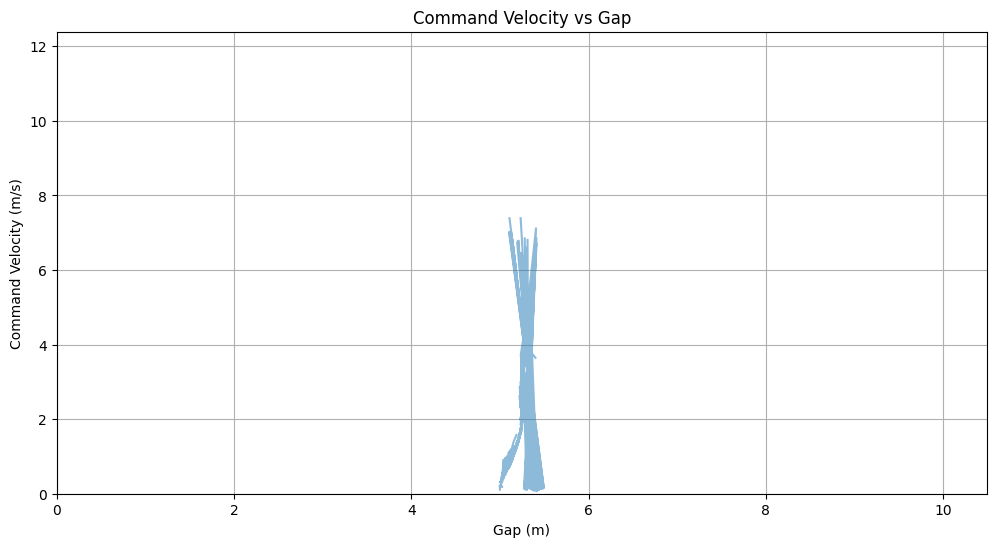

In [99]:
plot_command_velocity_and_gap(data,1100)

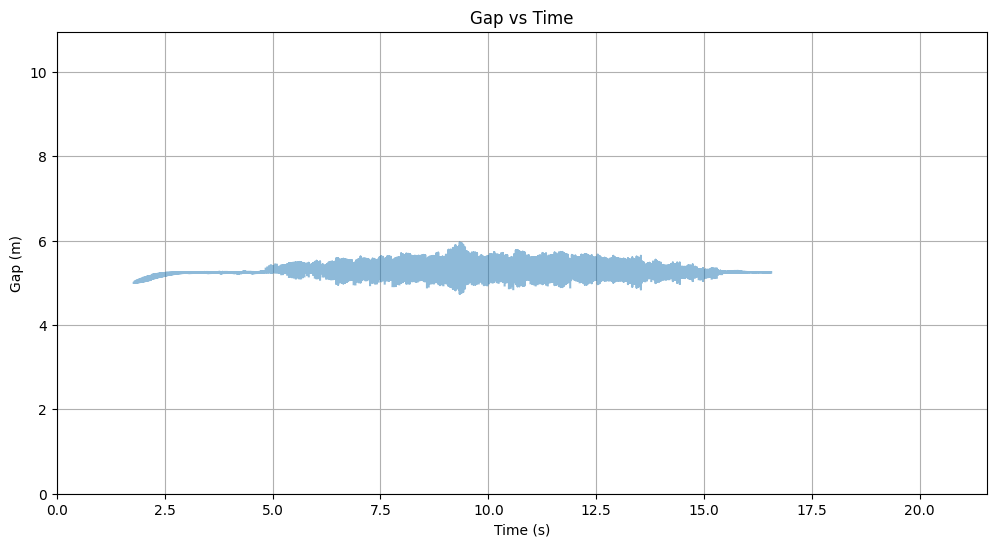

In [100]:
# plot gap vs time
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['gap'], alpha=0.5)
plt.title('Gap vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Gap (m)')
plt.grid(True)
plt.xlim(0, data['time'].max() + 5)
plt.ylim(0, data['gap'].max() + 5)
plt.show()

In [101]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_follower = data[data['name'] != 'leader']['speed'].max()
min_speed_follower = data[data['name'] != 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_follower:.3f} m/s")
print(f"Minimum speed value of follower vehicle: {min_speed_follower:.3f} m/s")


Maximum speed value of follower vehicle: 14.242 m/s
Minimum speed value of follower vehicle: 0.047 m/s


In [102]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_leader = data[data['name'] == 'leader']['speed'].max()
min_speed_leader = data[data['name'] == 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_leader:.3f} m/s")
print(f"Minimum speed value of leader vehicle: {min_speed_leader:.3f} m/s")

Maximum speed value of follower vehicle: 5.683 m/s
Minimum speed value of leader vehicle: 0.600 m/s


## Plot speed and time graph

In [127]:
def plot_speed(df,x_col,y_col,title, max_points: int = 1000,min_points: int = 0):
    df = df.iloc[min_points:max_points]  # Limit to max_points for clarity
    plt.figure(figsize=(12, 6))

    for label, group in df.groupby('name'):
        plt.plot(group[x_col], group[y_col], label=label,)
    
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.xlim(0, df[x_col].max() + 5)
    plt.ylim(0, df[y_col].max() + 5)
    plt.show()


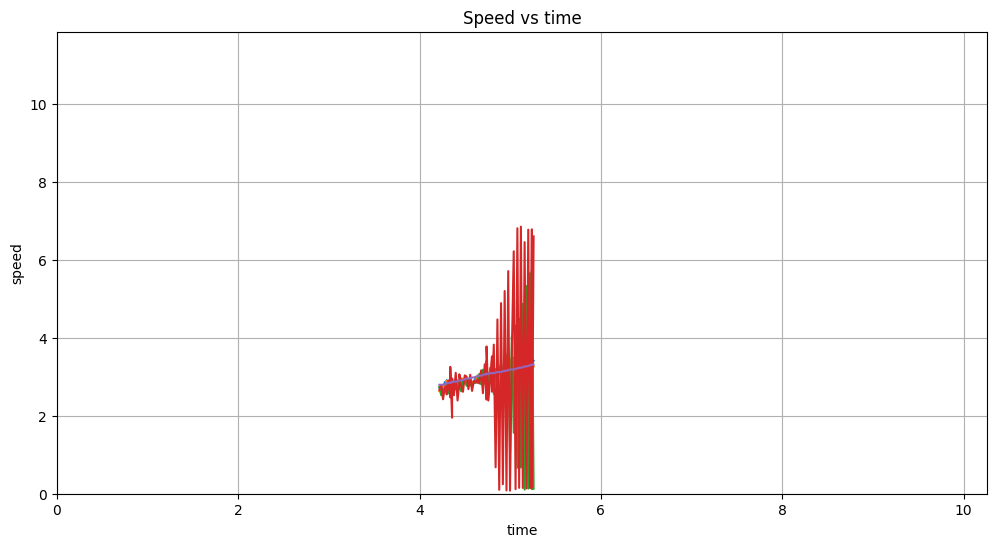

In [128]:
plot_speed(data,'time','speed','Speed vs time', max_points=1000,min_points=700)

In [129]:


def plot_follower_speed_profile(df, follower_name, max_points: int = None, min_points: int = 0):
    """
    Plots the speed profile for a specific follower vehicle.

    Args:
        df (pd.DataFrame): Data containing at least 'name', 'time', 'speed'.
        follower_name (str): Exact name of the follower to plot.
        max_points (int, optional): Max rows to plot. If None, plot all after min_points.
        min_points (int): Start plotting from this index.
    """
    follower_data = df[df['name'] == follower_name]
    if follower_data.empty:
        print(f"[Warning] No data found for follower: {follower_name}")
        return

    # Slice the data range
    if max_points is not None:
        follower_data = follower_data.iloc[min_points:max_points]
    else:
        follower_data = follower_data.iloc[min_points:]

    plt.figure(figsize=(10, 6))
    plt.plot(follower_data['time'], follower_data['speed'], label=follower_name)
    plt.xlabel('Time (s)')
    plt.ylabel('Speed (m/s)')
    plt.title(f'Speed Profile of {follower_name}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


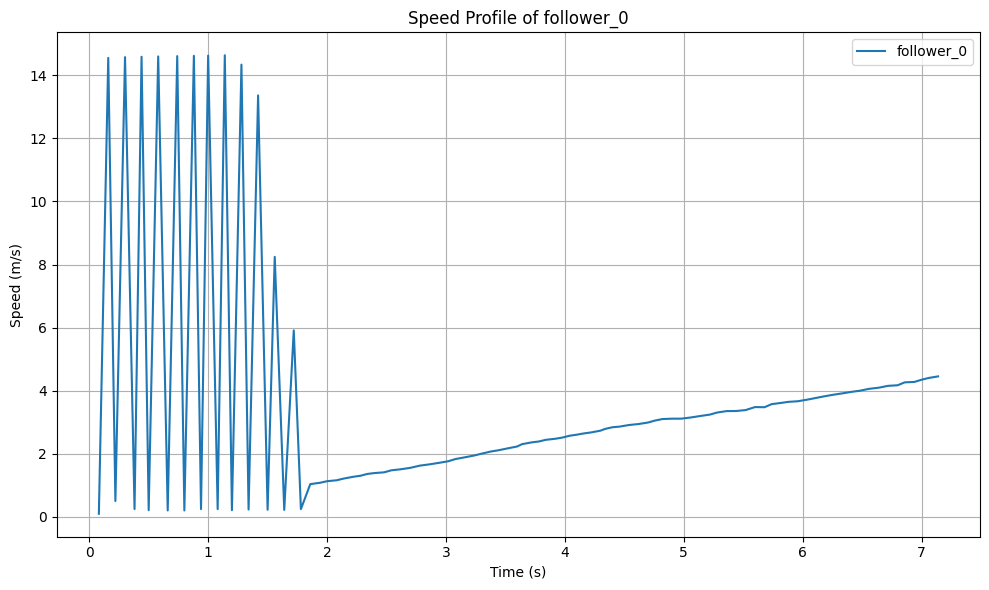

In [140]:
plot_follower_speed_profile(data, follower_name='follower_0', max_points=100,min_points=0)

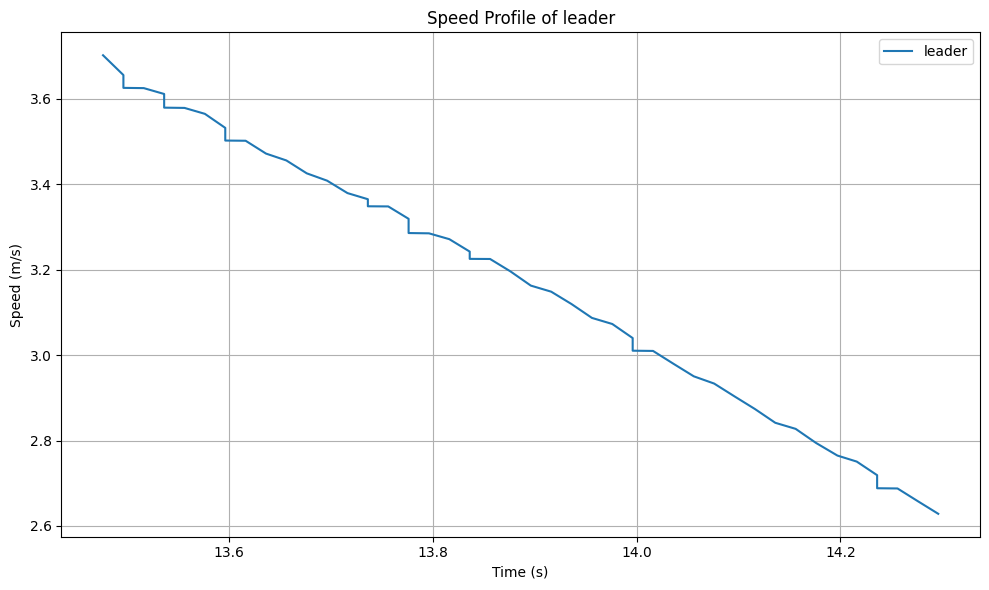

In [134]:
plot_follower_speed_profile(data, follower_name='leader', max_points=700,min_points=650)
